In [10]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import random
from plots.plots import plot_data, plot_result_directed, plot_result_undirected
from models import correlation_model, random_model
from models.helpers import *
from models.correlation_model import correlation_model
from models.random_model import random_model

In [11]:
# read raw data from CSV file:
gene_df = read_from_csv('gene-data.csv')

# discretize data into 5 bins of gene-specific limits:
gene_df_disc = discretize(gene_df,5)

# true network structure:
# ground_truth[i,j]=1 -> directed edge between gene i and gene j
ground_truth = result_to_df(np.array([[0,1,0,0,0],
                                      [0,0,1,0,0],
                                      [0,0,0,0,1],
                                      [0,0,0,0,0],
                                      [1,1,0,1,0]]))

In [12]:
gene_df.head()
#gene_df_disc.head()

,ASH1,CBF1,GAL4,GAL80,SWI5
time,,,,,
0,0.1033,0.0419,0.0207,0.0225,0.0760
10,0.0462,0.0365,0.0122,0.0175,0.0186
20,0.0439,0.0514,0.0073,0.0165,0.0090
30,0.0371,0.0473,0.0079,0.0147,0.0117
40,0.0475,0.0482,0.0084,0.0145,0.0088


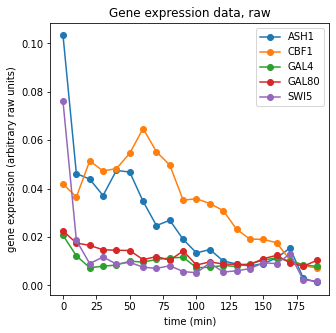

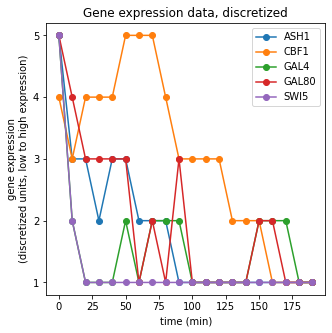

In [13]:
plot_data(gene_df, discr=False)
plot_data(gene_df_disc, discr=True)

In [14]:
corr_mat = correlation_model(gene_df, 0.75)

directed TPR = 0.333 and FPR = 0.211


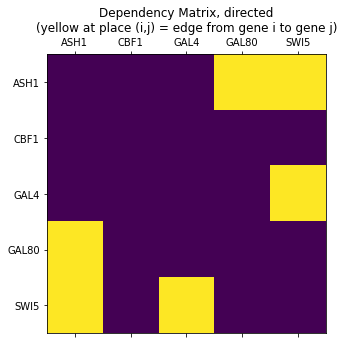

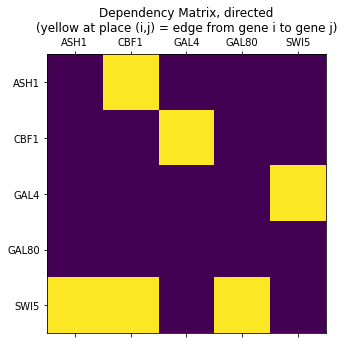

In [15]:
plot_result_directed(corr_mat)
plot_result_directed(ground_truth)
tpr,fpr = calculate_rates_directed(df_to_try=corr_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

undirected TPR = 0.333 and FPR = 0.154


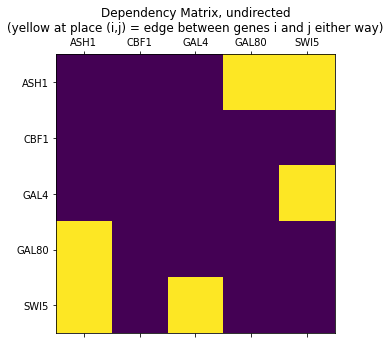

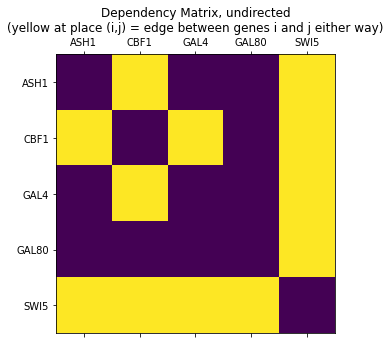

In [16]:
plot_result_undirected(corr_mat)
plot_result_undirected(ground_truth)
tpr,fpr = calculate_rates_undirected(df_to_try=corr_mat, df_true=ground_truth)
print('undirected TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))

In [17]:
random_mat = random_model(threshold=0.5)
random_mat = random_model(n_edges=6)

directed TPR = 0.167 and FPR = 0.263


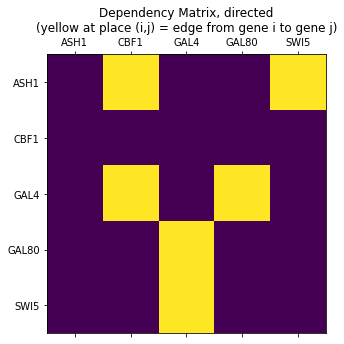

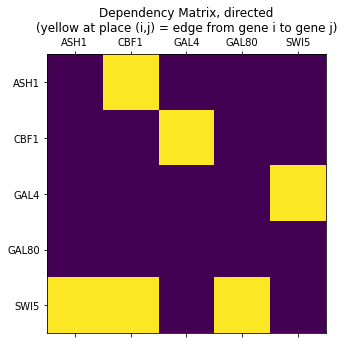

In [18]:
plot_result_directed(random_mat)
plot_result_directed(ground_truth)
tpr,fpr = calculate_rates_directed(df_to_try=random_mat, df_true=ground_truth)
print('directed TPR = {:.3f} and FPR = {:.3f}'.format(tpr,fpr))